<a href="https://colab.research.google.com/github/BabeeswaraReddy/ShadowFox/blob/main/X_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Load Dataset

from google.colab import files
uploaded = files.upload()

Saving X data.csv to X data.csv


In [4]:
# Replace filename with your uploaded file

df = pd.read_csv("X data.csv")

In [5]:
# Drop rows with missing text

df = df.dropna(subset=["clean_text"])

In [6]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (162976, 2)
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [7]:
sentiment_map = {-1: "Negative", 0: "Neutral", 1: "Positive"}
df["Sentiment"] = df["category"].map(sentiment_map)

In [8]:
sent_counts = df["Sentiment"].value_counts()

/tmp/ipython-input-1520932796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="coolwarm")


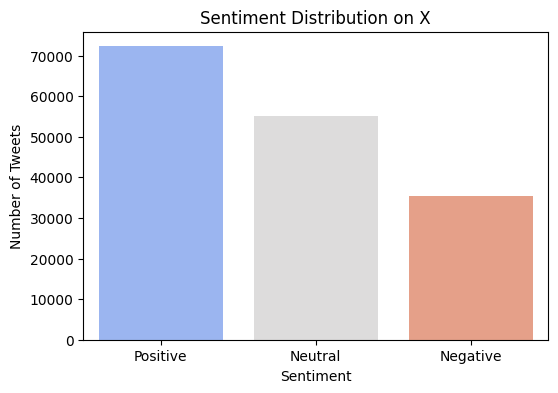

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution on X")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

In [10]:
stopwords = set(STOPWORDS)

In [11]:
def plot_wordcloud(sentiment):
    text = " ".join(tweet for tweet in df[df["Sentiment"] == sentiment]["clean_text"])
    wc = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment} Tweets")
    plt.show()

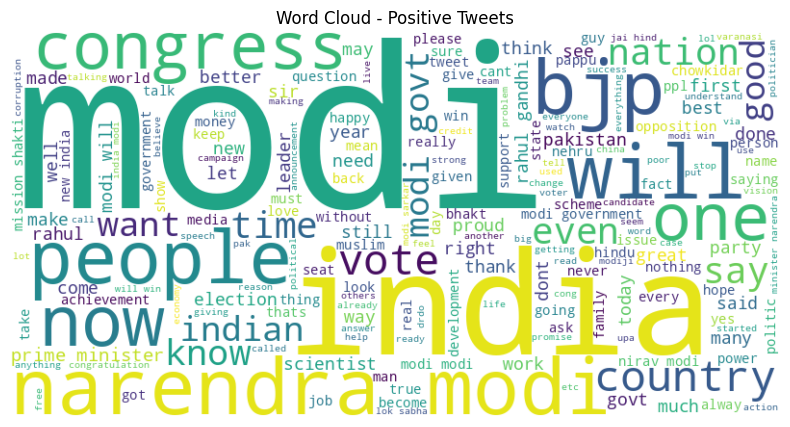

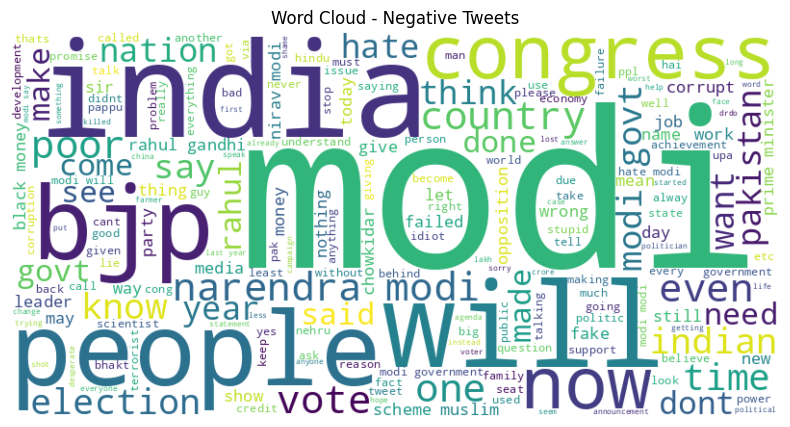

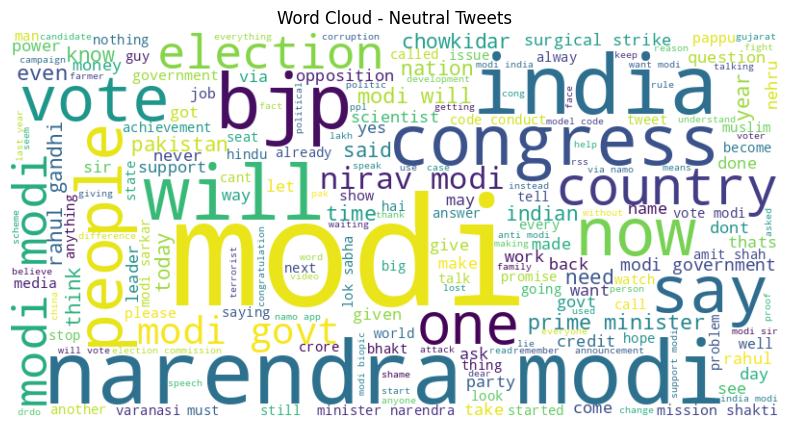

In [12]:
for s in ["Positive", "Negative", "Neutral"]:
    plot_wordcloud(s)